In [474]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nqDataLoader as nq #data loading library

In [475]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
def testClassifier(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred =  classifier.predict(X_test)
    titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            display_labels=None ,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))
    X = np.concatenate((X_train, X_test), axis=0) 
    y = np.concatenate((y_train, y_test), axis=0)
    scores = cross_val_score(classifier,X,y,cv=30)
    print("Mean accuracy of 30 fold cross validation test : "+ str(scores.mean()))
    print("with a maximum accuracy of " + str(scores.max()))

## importing the early_stage data set 

In [476]:
## importing the early stage dataset 
early_stage = pd.read_csv('GT_DataPD_MIT-CS2PD.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
early_stage.head()

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1
0,1000,True,27,79.0,184.5,0.107179,56.866667,1424946827.1000_001_014.csv
1,1001,True,16,96.5,189.0,0.056286,118.000000,1427279751.1001_001_014.csv
2,1002,False,5,140.0,158.0,0.039519,119.037037,1426676689.1002_001_014.csv
3,1004,True,22,83.5,191.5,0.034853,74.266667,1429866367.1004_001_014.csv
4,1005,True,17,68.0,150.0,0.048307,74.969697,1430134526.1005_001_014.csv


In [ ]:
Early_stage_SD = ear

## Calculating the SDI for early stage dataset 

In [477]:
SD_index = []
for index, row in early_stage.iterrows():
    fileloc = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( "data_MIT-CS2PD/" + early_stage.loc[index]['file_1'])
    fluctuations = []
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
    npFluctuations = np.array(fluctuations)
    sd_index_score = npFluctuations.std()
    SD_index.append(sd_index_score) 
    
    
early_stage["SDi"] = SD_index 

## preparing the dataset to only have SDi as a feature and the gt as the dependant variable

In [478]:
early_stage["gt"] = early_stage["gt"].astype(int)

early_stage.drop(["pID",'updrs108','afTap','sTap','nqScore','typingSpeed','file_1'], axis=1, inplace=True)
early_stage = early_stage[['SDi','gt']]
print(len(early_stage))
early_stage.head()


54


,SDi,gt
0,0.380584,1
1,0.378429,1
2,0.349012,0
3,0.354817,1
4,0.236304,1


## importing the de_novo dataset

In [479]:
## importing the de-novo dataset 
de_novo = pd.read_csv('GT_DataPD_MIT-CS1PD.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
print(len(de_novo))
de_novo.head()

31


,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
0,11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
1,60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
2,67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
3,68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


## calculating the SDi for the de_novo dataset 

In [480]:
##using both files 
SD_index = []
for index, row in de_novo.iterrows():
    fileloc1 = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_1'])
    
    fluctuations = []
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
    
    fileloc2 = row.file_2
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_2'])
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
        
    npFluctuations = np.array(fluctuations)
    sd_index_score = npFluctuations.std()
    SD_index.append(sd_index_score) 
    
    
de_novo["SDi"] = SD_index 
de_novo.head()

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2,SDi
0,11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv,0.564521
1,60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv,0.421491
2,67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv,0.448163
3,68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv,0.229087
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv,0.319824


## trimming the de_novo dataset to contain only the SDi as a feature and the gt as the target variable 

In [481]:
de_novo["gt"] = de_novo["gt"].astype(int)

de_novo.drop(["pID",'updrs108','afTap','sTap','nqScore','typingSpeed','file_1','file_2'], axis=1, inplace=True)
de_novo = de_novo[['SDi','gt']]
de_novo.head()

,SDi,gt
0,0.564521,1
1,0.421491,0
2,0.448163,1
3,0.229087,0
4,0.319824,1


## splitting the de_novo patients to double the dataset size by considering file_2 of a patient a different 

## appending the datasets together

In [482]:
print(len(early_stage))
print(len(de_novo))
early_stage = early_stage.append(de_novo, ignore_index=True)
print(len(early_stage))

54
31
85


C:\Users\micoa\AppData\Local\Temp\ipykernel_18948\344074529.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  early_stage = early_stage.append(de_novo, ignore_index=True)


## splitting the data into features and dependant variable and further splitting into train and testing data

In [483]:
X = early_stage.iloc[:, :-1].values
y = early_stage.iloc[:, -1].values

In [484]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [485]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [486]:
y_pred =  classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


Confusion matrix, without normalization
[[7 2]
 [3 5]]
Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.375      0.625     ]]


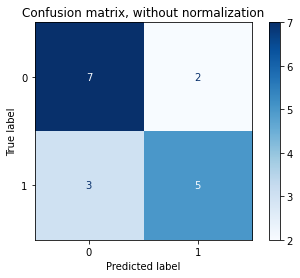

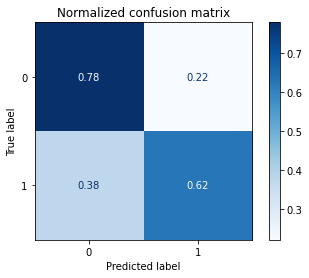

Accuracy score : 0.7058823529411765


In [487]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

[[0.46571989 0.53428011]
 [0.42944607 0.57055393]
 [0.52006731 0.47993269]
 [0.45100193 0.54899807]
 [0.50173492 0.49826508]
 [0.49242715 0.50757285]
 [0.54691235 0.45308765]
 [0.5083967  0.4916033 ]
 [0.5240034  0.4759966 ]
 [0.52246393 0.47753607]
 [0.55828145 0.44171855]
 [0.48326709 0.51673291]
 [0.5118346  0.4881654 ]
 [0.48519636 0.51480364]
 [0.48265371 0.51734629]
 [0.54390249 0.45609751]
 [0.50350155 0.49649845]]


C:\Users\micoa\anaconda3\envs\classifiertest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


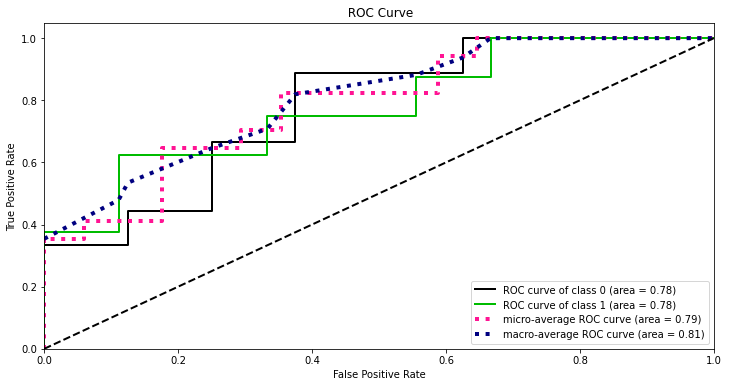

In [488]:
import scikitplot as skplt
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
Y_test_probs = classifier.predict_proba(X_test)
print(Y_test_probs)
skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title=" ROC Curve", figsize=(12,6));

In [489]:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

0.7777777777777778


In [490]:
print(classifier.coef_)
print(classifier.intercept_)
print(np.concatenate((X_test.reshape(len(X_test),1), y_pred.reshape(len(y_pred),1)),1))

[[1.45338529]]
[-0.56714193]
[[0.48471511 0.        ]
 [0.5857039  0.        ]
 [0.33496248 0.        ]
 [0.52550774 1.        ]
 [0.38544647 0.        ]
 [0.41106487 1.        ]
 [0.2607285  1.        ]
 [0.3671098  1.        ]
 [0.32410845 1.        ]
 [0.32835455 0.        ]
 [0.22908695 0.        ]
 [0.43629075 0.        ]
 [0.35764411 0.        ]
 [0.43097575 1.        ]
 [0.43798087 0.        ]
 [0.26908114 1.        ]
 [0.38058421 0.        ]]


## attempting to use K-neighrest neighbour 

In [491]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [492]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]]


Confusion matrix, without normalization
[[6 3]
 [5 3]]
Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.625      0.375     ]]


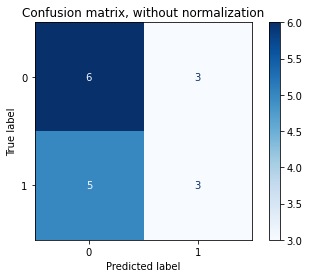

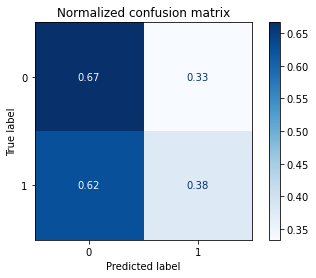

Accuracy Score : 0.5294117647058824


In [493]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy Score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [494]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [495]:
y_pred =  classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]]


Confusion matrix, without normalization
[[7 2]
 [3 5]]
Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.375      0.625     ]]


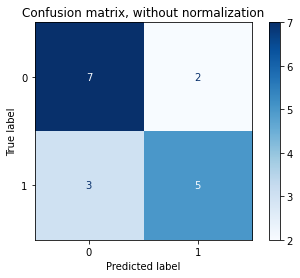

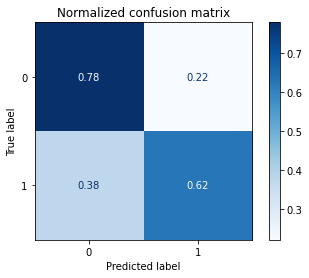

Accuracy score : 0.7058823529411765


In [496]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [497]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [498]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]]


Confusion matrix, without normalization
[[8 1]
 [3 5]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.375      0.625     ]]


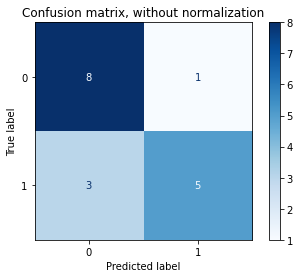

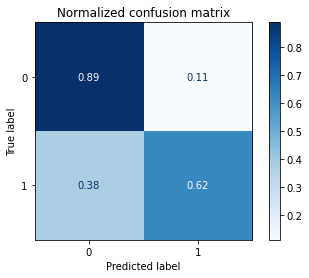

Accuracy score : 0.7647058823529411


In [499]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [500]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1, criterion = 'entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1)

In [501]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]]


Confusion matrix, without normalization
[[5 4]
 [2 6]]
Normalized confusion matrix
[[0.55555556 0.44444444]
 [0.25       0.75      ]]


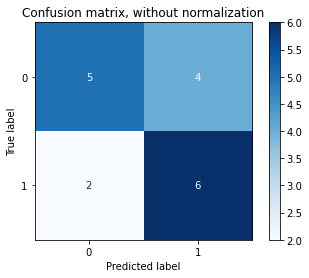

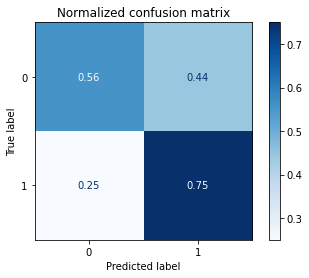

Accuracy score : 0.6470588235294118


In [502]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [503]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svc = SVC()
classifier = BaggingClassifier(base_estimator=svc , n_estimators=100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]]


Confusion matrix, without normalization
[[7 2]
 [3 5]]
Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.375      0.625     ]]


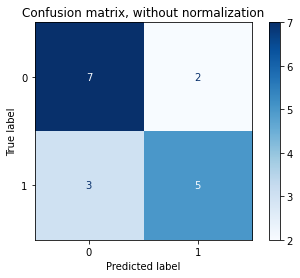

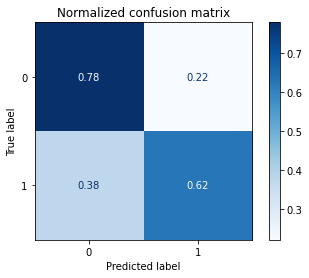

Accuracy score : 0.7058823529411765


In [504]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

C:\Users\micoa\anaconda3\envs\classifiertest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


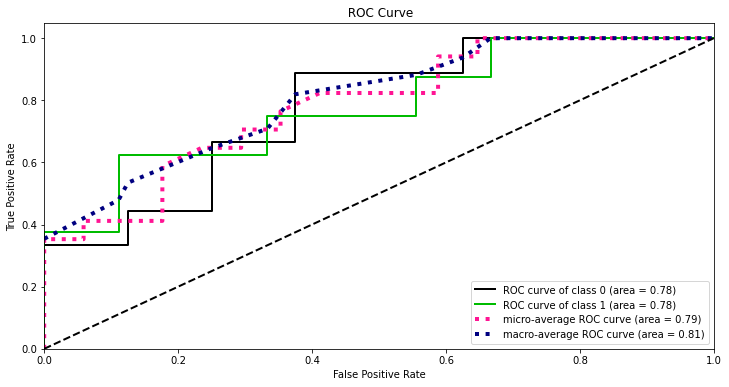

In [505]:
import scikitplot as skplt
Y_test_probs = classifier.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title=" ROC Curve", figsize=(12,6));

In [506]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(),X,y,cv=30)
scores.mean()

0.6333333333333333

In [507]:
from sklearn.metrics import classification_report
grid_predictions = classifier.predict(X_test) 
 
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.71      0.62      0.67         8

    accuracy                           0.71        17
   macro avg       0.71      0.70      0.70        17
weighted avg       0.71      0.71      0.70        17



Confusion matrix, without normalization
[[7 2]
 [3 5]]
Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.375      0.625     ]]


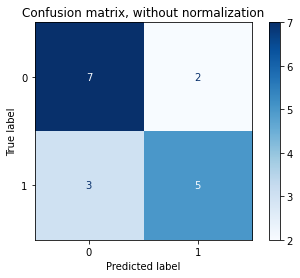

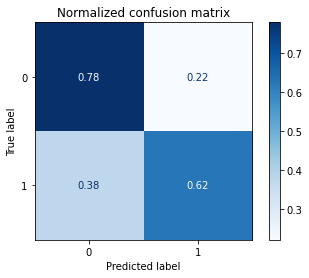

Accuracy score : 0.7058823529411765
Mean accuracy of 30 fold cross validation test : 0.6833333333333333
with a maximum accuracy of 1.0


In [508]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0,probability=True)
testClassifier(classifier,X_train,X_test,y_train,y_test)

In [509]:
from sklearn.metrics import classification_report
grid_predictions = classifier.predict(X_test) 
 
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.71      0.62      0.67         8

    accuracy                           0.71        17
   macro avg       0.71      0.70      0.70        17
weighted avg       0.71      0.71      0.70        17



C:\Users\micoa\anaconda3\envs\classifiertest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


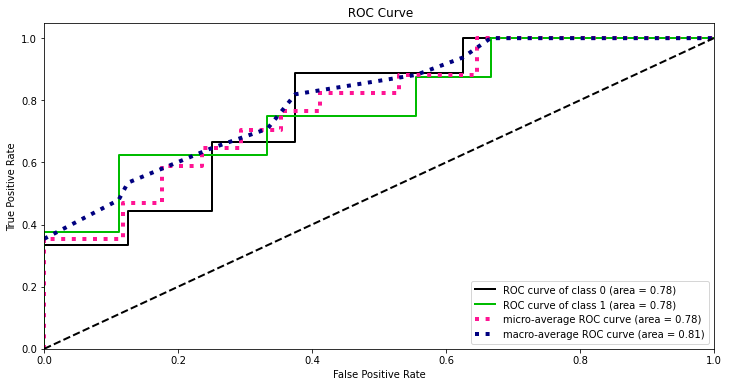

In [510]:
import scikitplot as skplt
Y_test_probs = classifier.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title=" ROC Curve", figsize=(12,6));

In [511]:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)



0.7777777777777778
